In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice
data_fol = r"..\data_files"

In [38]:
X_path = os.path.join(data_fol, 'bigrams_model', "gram2_X_train_scaled_pca.pkl")
y_path = os.path.join(data_fol, 'bigrams_model', "gram2_y_train.pkl")

X = pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

In [44]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
y.head()

tid
1361890179951296512      3.25
1358354354462289920    165.00
1363916379519336448      0.00
1369296990782320648     31.00
1369559005811662851      0.00
Name: all_engagement, dtype: float64

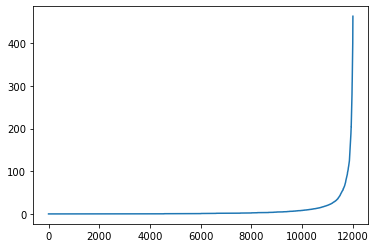

In [5]:
plt.plot(y.sort_values(ascending=True).values)
plt.show()

In [6]:
y.describe()

count    12009.000000
mean         8.291177
std         29.330109
min          0.000000
25%          0.000000
50%          0.750000
75%          4.500000
max        463.250000
Name: all_engagement, dtype: float64

In [7]:
np.percentile(y.values, [75, 95])

array([ 4.5 , 35.25])

In [8]:
def map_categories(x):
    if x < 1:
        return "zero"
    elif 1 <= x < 4.5:
        return "low"
    elif 4.5 <= x <= 35.25:
        return "med"
    else:
        return "high"
    

In [39]:
y_cat = y.apply(lambda x: map_categories(x))

In [40]:
y_cat.value_counts()

zero    6015
low     2991
med     2403
high     600
Name: all_engagement, dtype: int64

#### Support Vector Classification

In [11]:
svc = SVC()
crossval = cross_val_score(svc, X, y['categories'], cv=3)
crossval

array([0.51311516, 0.5058706 , 0.51486385])

In [12]:
svc = SVC(gamma='auto')
crossval = cross_val_score(svc, X, y['categories'], cv=3)
crossval

array([0.51261554, 0.50562078, 0.5138646 ])

In [17]:
param_distributions = dict(C=[.6,.8,1,1.2])

svc = SVC()
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y['categories'])

In [24]:
search.cv_results_

{'mean_fit_time': array([13.83187048, 14.28327918, 14.7785933 , 14.78392752]),
 'std_fit_time': array([1.19074224, 0.36370236, 0.67472446, 1.51664576]),
 'mean_score_time': array([7.66266481, 7.45958177, 9.21878401, 7.4580578 ]),
 'std_score_time': array([0.18544233, 0.15880022, 1.30577416, 0.68666271]),
 'param_C': masked_array(data=[0.6, 0.8, 1, 1.2],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.6}, {'C': 0.8}, {'C': 1}, {'C': 1.2}],
 'split0_test_score': array([0.51736198, 0.51661254, 0.51311516, 0.51211591]),
 'split1_test_score': array([0.50711966, 0.50612041, 0.5058706 , 0.50612041]),
 'split2_test_score': array([0.51561329, 0.51536348, 0.51486385, 0.51411441]),
 'mean_test_score': array([0.51336498, 0.51269881, 0.5112832 , 0.51078358]),
 'std_test_score': array([0.00447344, 0.0046795 , 0.0038933 , 0.0033968 ]),
 'rank_test_score': array([1, 2, 3, 4])}

In [25]:
param_distributions = dict(kernel = ['poly', 'rbf', 'sigmoid',])

svc = SVC()
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y['categories'])

In [26]:
search.cv_results_

{'mean_fit_time': array([15.94440905, 14.86807688, 53.96363036]),
 'std_fit_time': array([ 0.24136008,  0.73589307, 49.20670094]),
 'mean_score_time': array([2.87916613, 8.12712995, 3.11866252]),
 'std_score_time': array([0.22514256, 0.12947434, 0.57878802]),
 'param_kernel': masked_array(data=['poly', 'rbf', 'sigmoid'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'poly'}, {'kernel': 'rbf'}, {'kernel': 'sigmoid'}],
 'split0_test_score': array([0.49313015, 0.51311516, 0.41868599]),
 'split1_test_score': array([0.49163128, 0.5058706 , 0.40869348]),
 'split2_test_score': array([0.4961279 , 0.51486385, 0.42817887]),
 'mean_test_score': array([0.49362978, 0.5112832 , 0.41851944]),
 'std_test_score': array([0.00186943, 0.0038933 , 0.00795575]),
 'rank_test_score': array([2, 1, 3])}

In [28]:
search.best_params_

{'kernel': 'rbf'}

In [29]:
search.best_score_

0.5112832042634691

In [30]:
param_distributions = dict(gamma = ['scale', 'auto'])

svc = SVC(C=.6, kernel='rbf')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y['categories'])

In [31]:
search.cv_results_

{'mean_fit_time': array([14.8089234 , 16.14172022]),
 'std_fit_time': array([1.05134109, 0.5491882 ]),
 'mean_score_time': array([9.68356331, 7.90214642]),
 'std_score_time': array([0.58455317, 0.53488863]),
 'param_gamma': masked_array(data=['scale', 'auto'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 'scale'}, {'gamma': 'auto'}],
 'split0_test_score': array([0.51736198, 0.51561329]),
 'split1_test_score': array([0.50711966, 0.5058706 ]),
 'split2_test_score': array([0.51561329, 0.5158631 ]),
 'mean_test_score': array([0.51336498, 0.512449  ]),
 'std_test_score': array([0.00447344, 0.00465275]),
 'rank_test_score': array([1, 2])}

In [32]:
search.best_params_

{'gamma': 'scale'}

In [45]:
svr = SVR()
crossval = cross_val_score(svr, X, y, cv=3)
crossval

array([-0.04409429, -0.05133614, -0.04152926])

#### Multinomial NB

In [50]:
X.values.min()

-33.655362535703894

In [51]:
X_noneg = X.apply(lambda x: x+34)

In [52]:
X_noneg.values.min()

0.3446374642961061

In [53]:
mnb = MultinomialNB()
mnb.fit(X_noneg,y_cat)

MultinomialNB()

In [55]:
mnb.score(X_noneg,y_cat)

0.5008743442418186

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
param_distributions = dict(max_depth = [5,10,15])

rf = RandomForestClassifier(n_estimators=30)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [59]:
search.cv_results_

{'mean_fit_time': array([0.93549848, 1.69712822, 1.96207412]),
 'std_fit_time': array([0.03638173, 0.06171808, 0.0470537 ]),
 'mean_score_time': array([0.03257966, 0.04587817, 0.05679345]),
 'std_score_time': array([0.00981618, 0.01694438, 0.02313878]),
 'param_max_depth': masked_array(data=[5, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}, {'max_depth': 10}, {'max_depth': 15}],
 'split0_test_score': array([0.53260055, 0.51686235, 0.48838371]),
 'split1_test_score': array([0.52685486, 0.51811142, 0.49337997]),
 'split2_test_score': array([0.52735448, 0.51961029, 0.50437172]),
 'mean_test_score': array([0.52893663, 0.51819469, 0.49537847]),
 'std_test_score': array([0.0025988 , 0.00112339, 0.0066783 ]),
 'rank_test_score': array([1, 2, 3])}

In [60]:
param_distributions = dict(max_depth = [5,20])

rf = RandomForestClassifier(n_estimators=100)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [61]:
search.cv_results_

{'mean_fit_time': array([ 2.60638698, 11.76140285]),
 'std_fit_time': array([0.08245327, 2.89582593]),
 'mean_score_time': array([0.0513049 , 0.25352804]),
 'std_score_time': array([0.00440495, 0.01956199]),
 'param_max_depth': masked_array(data=[5, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}, {'max_depth': 20}],
 'split0_test_score': array([0.52885336, 0.4801399 ]),
 'split1_test_score': array([0.52460655, 0.47814139]),
 'split2_test_score': array([0.52710467, 0.48688484]),
 'mean_test_score': array([0.52685486, 0.48172204]),
 'std_test_score': array([0.00174273, 0.00374071]),
 'rank_test_score': array([1, 2])}

In [62]:
param_distributions = dict(max_depth = [4,5,6])

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y_cat)

In [64]:
search.cv_results_

{'mean_fit_time': array([ 8.27630909, 10.47319221, 12.52640375]),
 'std_fit_time': array([0.4528509 , 0.67815479, 0.2557969 ]),
 'mean_score_time': array([0.10269634, 0.11011227, 0.12393888]),
 'std_score_time': array([0.01461381, 0.01365805, 0.00604498]),
 'param_max_depth': masked_array(data=[4, 5, 6],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}],
 'split0_test_score': array([0.52610542, 0.52735448, 0.53085186]),
 'split1_test_score': array([0.52385711, 0.52635523, 0.52610542]),
 'split2_test_score': array([0.52510617, 0.52610542, 0.52810392]),
 'mean_test_score': array([0.5250229 , 0.52660505, 0.52835373]),
 'std_test_score': array([0.00091976, 0.00053966, 0.00194576]),
 'rank_test_score': array([3, 2, 1])}

#### kmeans

In [66]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=4, random_state=0)
crossval = cross_val_score(kmeans, X, y_cat, cv=3)
crossval

array([-470619.36201265, -518136.983882  , -524078.54905198])

In [72]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [73]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
results = y_cat.to_frame()
results['clusters'] = kmeans.labels_
results.head()

,all_engagement,clusters
tid,,
1361890179951296512,low,0
1358354354462289920,high,0
1363916379519336448,zero,0
1369296990782320648,med,0
1369559005811662851,zero,0


In [80]:
pd.crosstab(results.all_engagement, results.clusters)

clusters,0,1,2,3
all_engagement,,,,
high,599,0,0,1
low,2972,0,10,9
med,2395,0,3,5
zero,5882,72,50,11


In [81]:
from sklearn.mixture import GaussianMixture

In [84]:
gmm = GaussianMixture(n_components=4, random_state=0)

In [85]:
gmm.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [87]:
gmm.means_

array([[ 2.92683077e-01,  3.38638424e-01, -2.12292482e-01,
         1.09359034e-01,  2.45547349e-01, -8.57480200e-02,
        -5.14627492e-02, -2.22024233e-02,  2.27211422e-01,
        -2.48225151e-02,  9.08840558e-03, -1.70125229e-01,
         1.43603212e-01,  9.14918061e-02,  6.30571580e-03,
         7.85446972e-02,  1.80668968e-02,  2.21463786e-02,
         1.25982060e-02, -6.87026347e-02,  9.37797549e-03,
         4.85540581e-02,  4.63523232e-02,  5.34004590e-02,
         7.40226410e-02,  5.42549046e-02,  1.34658882e-02,
        -2.67378464e-02, -3.88343652e-02,  5.54953888e-02,
         7.68580906e-03, -2.57182254e-02, -1.97989788e-02,
        -3.47529931e-02, -5.97405295e-03, -2.24197173e-02,
        -3.20581913e-04,  5.80419189e-03,  3.60620246e-03,
        -1.50390701e-02, -3.04904683e-02,  3.59302704e-03,
        -1.67052979e-02, -5.90356233e-02, -2.11271581e-02,
        -2.25033110e-03, -1.33706014e-02,  5.75278572e-02,
         1.63541401e-03,  2.17061686e-02,  1.11508606e-0

In [89]:
labels = gmm.predict(X)

In [90]:
results = y_cat.to_frame()
results['clusters'] = labels
results.head()

,all_engagement,clusters
tid,,
1361890179951296512,low,3
1358354354462289920,high,0
1363916379519336448,zero,3
1369296990782320648,med,0
1369559005811662851,zero,0


In [91]:
pd.crosstab(results.all_engagement, results.clusters)

clusters,0,1,2,3
all_engagement,,,,
high,270,2,0,328
low,1330,14,2,1645
med,964,17,5,1417
zero,2915,101,16,2983
